# Ingeniería de features, Modelos avanzados e Interpretación de modelos #
### Aplica ingeniería de Features y Modelos Avanzados para desarrollar con mayor profundidad tu modelo de Machine Learning. ¿Qué puedes aprender del problema que estás abordando mediante el estudio de tu propio modelo? #

En este proyecto profundizarás lo desarrollado en el proyecto 01 (“Primer modelo de Machine Learning”). El objetivo es aplicar las técnicas incorporadas (Transformación de Datos, Optimización de Hiperparámetros, Modelos Avanzados, etc.) para generar un modelo que tenga un mejor desempeño que el modelo generado en el proyecto anterior. Luego, interpreta ese modelo para responder la siguiente pregunta: ¿qué podemos aprender de nuestro problema estudiando el modelo que generamos?

### PARTE A - Transformación de Datos
Elige cuáles de las siguientes tareas son apropiadas para su dataset. Implementa las transformaciones que elegiste. Es importante que justifiques por qué las haces:
* Detección y eliminación de Outliers
* Encoding
* Imputación de valores faltantes
* Escalado de datos
* Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - con este nuevo dataset transformado . Evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Compara con el desempeño obtenido en el proyecto 01. Sea cual sea la respuesta, intenta explicar a qué se debe.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
df = pd.DataFrame(data)

prodf_caba= df.copy()
prodf_caba= prodf_caba[(prodf_caba['l2']== 'Capital Federal')]

df_filter = pd.DataFrame(prodf_caba)
df_filter = prodf_caba[(prodf_caba['property_type']== 'Departamento') | (prodf_caba['property_type']== 'Casa') | (prodf_caba['property_type']== 'PH')]

In [3]:
df = df_filter.copy()

df = df[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price', 'property_type']]
df = df.dropna()

In [4]:
sup= df[(df['surface_total'] >= 15.0) & (df['surface_total']<= 1000.00)]
sup.surface_total.max()
df = pd.concat([sup], axis=1,  sort=False)
df.shape

(81051, 7)

In [5]:
pre = df[(df['price'] <= 4000000)]
df = pd.concat([pre], axis=1, sort= False)
df.shape

(81019, 7)

In [6]:
err = df[(df['surface_total']) >= (df['surface_covered'])]
df = pd.concat([err], axis=1, sort= False)
df.shape

(80276, 7)

In [7]:
df.isnull().sum()

rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

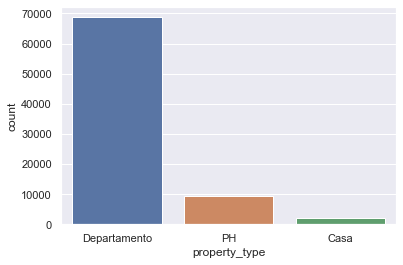

In [8]:
sns.countplot(df.property_type)

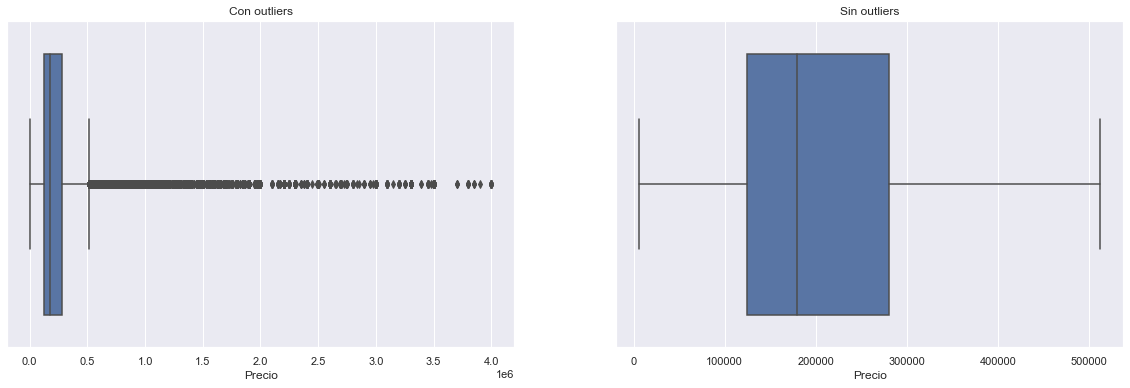

In [9]:
plt.figure(figsize=(10*2, 6))

plt.subplot(1,2,1)
sns.boxplot(data= df, x='price')
plt.xlabel('Precio')
plt.title('Con outliers')

plt.subplot(1,2,2)
sns.boxplot(data= df, x='price', showfliers=False)
plt.xlabel('Precio')
plt.title('Sin outliers')
plt.show()

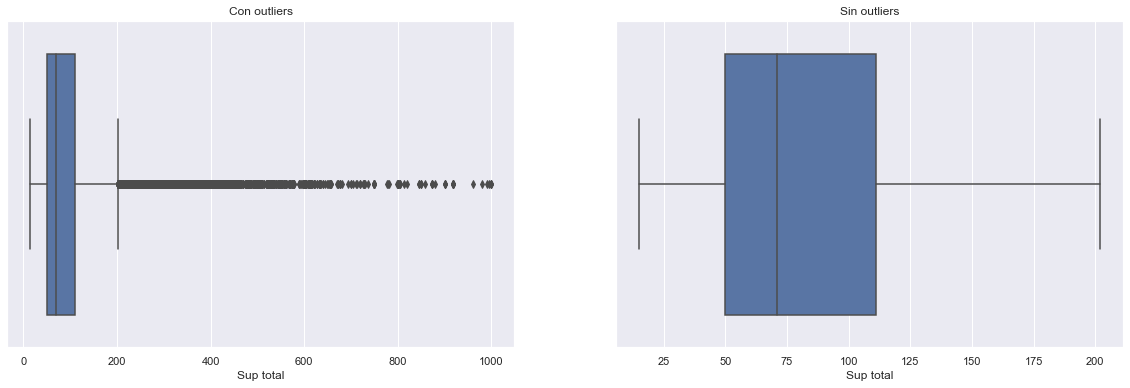

In [10]:
plt.figure(figsize=(10*2, 6))

plt.subplot(1,2,1)
sns.boxplot(data= df, x='surface_total')
plt.xlabel('Sup total')
plt.title('Con outliers')

plt.subplot(1,2,2)
sns.boxplot(data= df, x='surface_total', showfliers=False)
plt.xlabel('Sup total')
plt.title('Sin outliers')
plt.show()

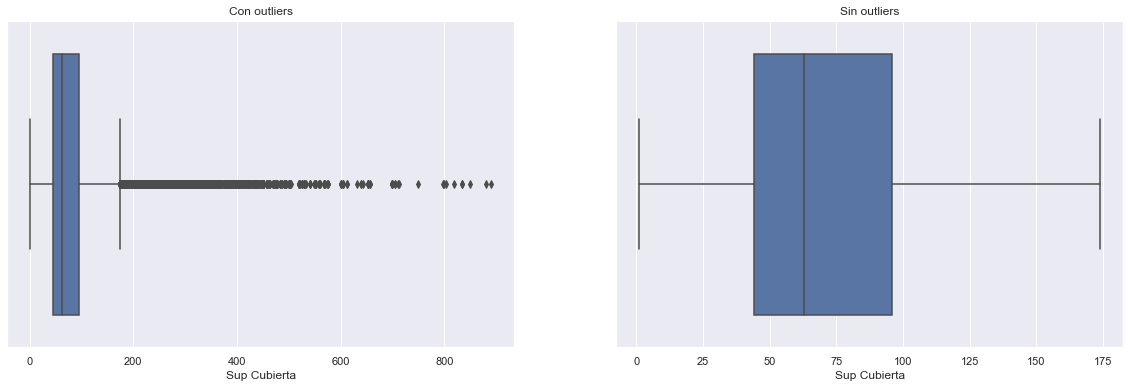

In [11]:
plt.figure(figsize=(10*2, 6))

plt.subplot(1,2,1)
sns.boxplot(data= df, x='surface_covered')
plt.xlabel('Sup Cubierta')
plt.title('Con outliers')

plt.subplot(1,2,2)
sns.boxplot(data= df, x='surface_covered', showfliers=False)
plt.xlabel('Sup Cubierta')
plt.title('Sin outliers')
plt.show()

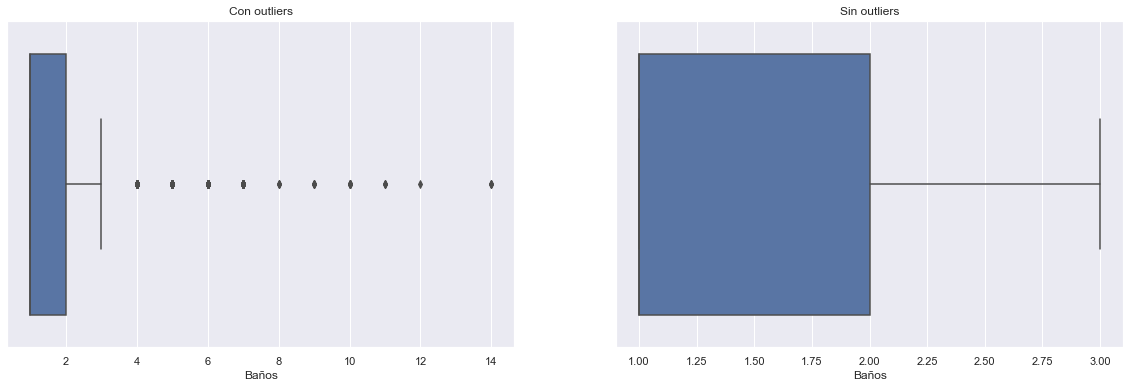

In [12]:
plt.figure(figsize=(10*2, 6))

plt.subplot(1,2,1)
sns.boxplot(data= df, x='bathrooms')
plt.xlabel('Baños')
plt.title('Con outliers')

plt.subplot(1,2,2)
sns.boxplot(data= df, x='bathrooms', showfliers=False)
plt.xlabel('Baños')
plt.title('Sin outliers')
plt.show()

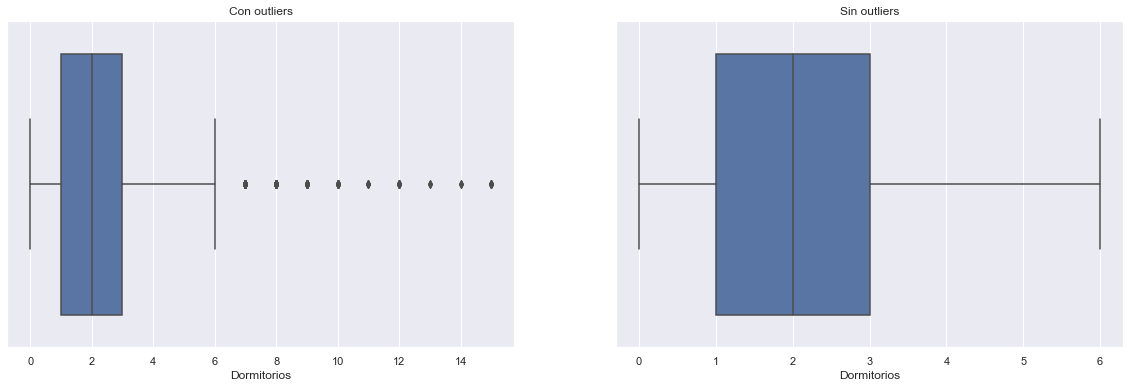

In [13]:
plt.figure(figsize=(10*2, 6))

plt.subplot(1,2,1)
sns.boxplot(data= df, x='bedrooms')
plt.xlabel('Dormitorios')
plt.title('Con outliers')

plt.subplot(1,2,2)
sns.boxplot(data= df, x='bedrooms', showfliers=False)
plt.xlabel('Dormitorios')
plt.title('Sin outliers')
plt.show()

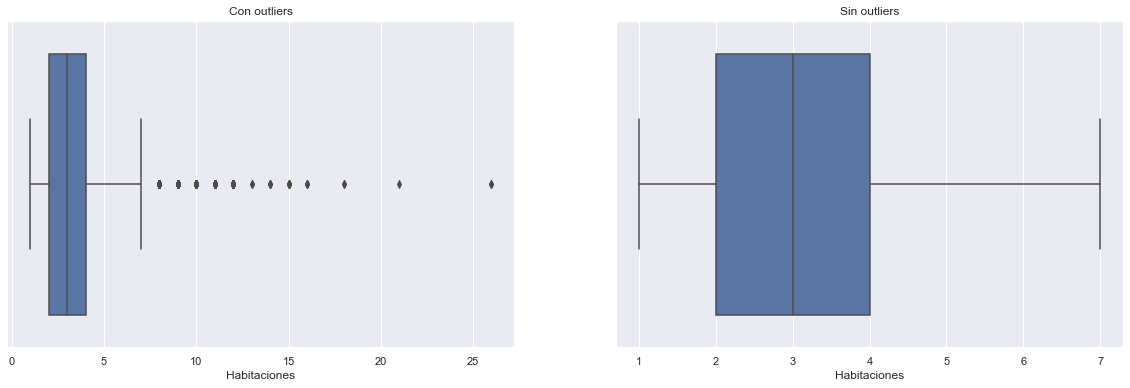

In [14]:
plt.figure(figsize=(10*2, 6))

plt.subplot(1,2,1)
sns.boxplot(data= df, x='rooms')
plt.xlabel('Habitaciones')
plt.title('Con outliers')

plt.subplot(1,2,2)
sns.boxplot(data= df, x='rooms', showfliers=False)
plt.xlabel('Habitaciones')
plt.title('Sin outliers')
plt.show()

In [9]:
df.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,80276.000000,80276.000000,80276.000000,80276.000000,80276.000000,8.027600e+04
mean,3.006303,1.999576,1.553640,95.363982,82.059694,2.640808e+05
std,1.297065,1.043244,0.850479,77.139099,61.471023,2.995059e+05
min,1.000000,0.000000,1.000000,15.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,50.000000,44.000000,1.250000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.800000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.800000e+05
max,26.000000,15.000000,14.000000,1000.000000,891.000000,4.000000e+06


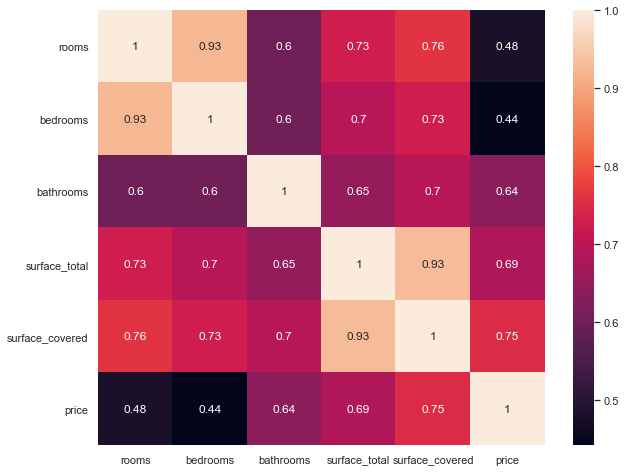

In [10]:
cor = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor, annot=True)
plt.show()

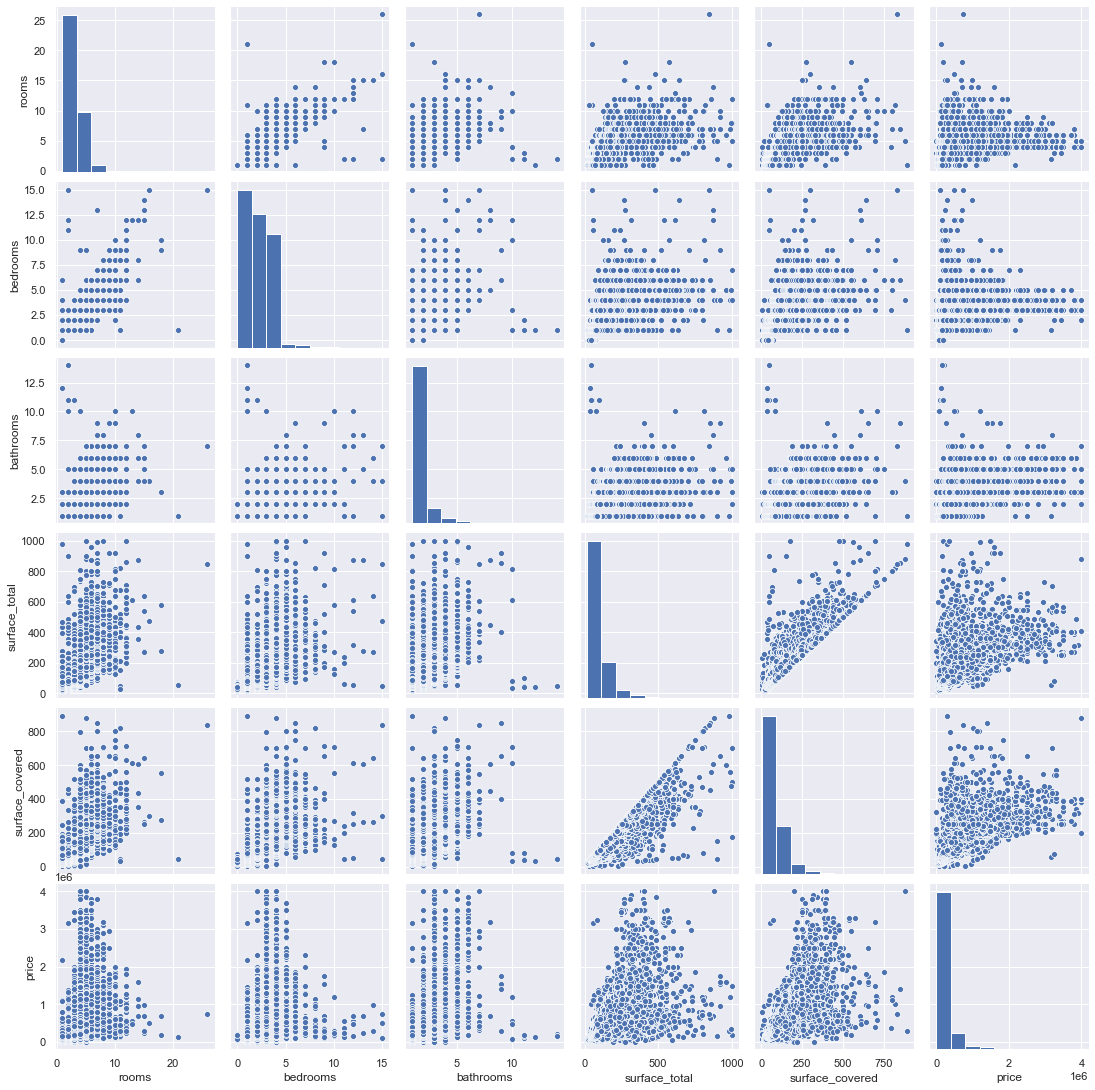

In [34]:
sns.pairplot(df)

Regla de los 3 sigmas

In [7]:
media = df.mean()
des = df.std()
mi = media - 2*des
ma = media + 2*des
outliers = (df > mi) & (df < ma)
df[outliers]

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,NaN,NaN,2.0,140.0,140.0,153000.0,NaN
1,2.0,1.0,2.0,70.0,58.0,159000.0,NaN
2,2.0,1.0,1.0,45.0,45.0,125000.0,NaN
3,2.0,1.0,1.0,85.0,50.0,295000.0,NaN
5,2.0,1.0,1.0,56.0,56.0,150000.0,NaN
...,...,...,...,...,...,...,...
146554,4.0,3.0,3.0,175.0,111.0,570000.0,NaN
146555,3.0,2.0,2.0,144.0,134.0,480000.0,NaN
146556,4.0,2.0,2.0,NaN,143.0,530000.0,NaN
146557,3.0,2.0,2.0,145.0,145.0,420000.0,NaN


In [8]:
ad = df[outliers].copy()
df1 = pd.DataFrame(ad)
df1.shape

(80276, 7)

In [9]:
df1 = df1.drop(['property_type'], axis= 1)

In [10]:
df1['property_type'] = df['property_type']

In [11]:
df1.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,77372.000000,79052.000000,77428.000000,76427.000000,76695.000000,77482.000000
mean,2.862134,1.940457,1.449824,82.324833,72.261503,219460.802806
std,1.043808,0.919257,0.649912,45.970038,38.391379,142909.921588
min,1.000000,0.000000,1.000000,15.000000,1.000000,6000.000000
25%,2.000000,1.000000,1.000000,48.000000,44.000000,123330.250000
50%,3.000000,2.000000,1.000000,69.000000,60.000000,175000.000000
75%,4.000000,3.000000,2.000000,102.000000,90.000000,266000.000000
max,5.000000,4.000000,3.000000,249.000000,205.000000,862000.000000


In [12]:
print(df1.loc[df1['surface_covered'].idxmin()])
print(df.loc[df['surface_covered'].idxmin()].count())

rooms                         4
bedrooms                      3
bathrooms                     2
surface_total               125
surface_covered               1
price                    800000
property_type      Departamento
Name: 26523, dtype: object
7


In [13]:
surc= df1[(df1['surface_covered'] >= 10.0) & (df1['surface_covered'] <= 327.0)]
df1 = pd.concat([surc], axis=1, sort= False)

In [14]:
df1.shape

(76671, 7)

In [15]:
print(df1.min())
print('---------------')
print(df1.max())

rooms                 1
bedrooms              0
bathrooms             1
surface_total        15
surface_covered      10
price              6000
property_type      Casa
dtype: object
---------------
rooms                   5
bedrooms                4
bathrooms               3
surface_total         249
surface_covered       205
price              862000
property_type          PH
dtype: object


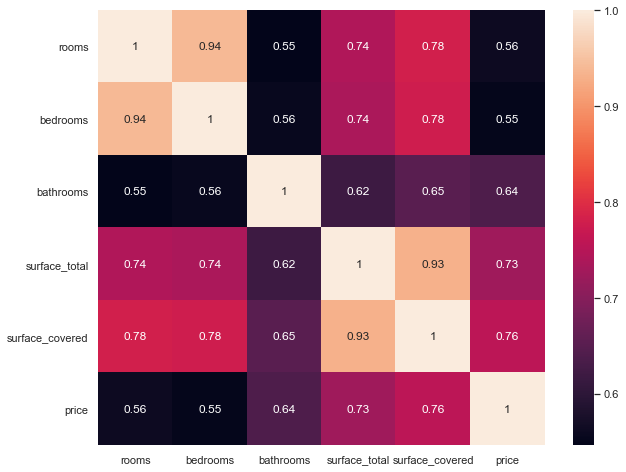

In [16]:
a = df1.corr()
plt.figure(figsize=(10,8))
sns.heatmap(a, annot=True)
plt.show()

In [17]:
df1.isnull().sum()

rooms              1240
bedrooms            538
bathrooms          1523
surface_total      1105
surface_covered       0
price               993
property_type         0
dtype: int64

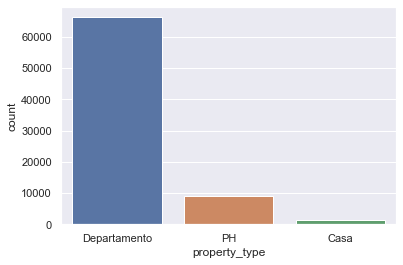

In [18]:
sns.countplot(df1.property_type)

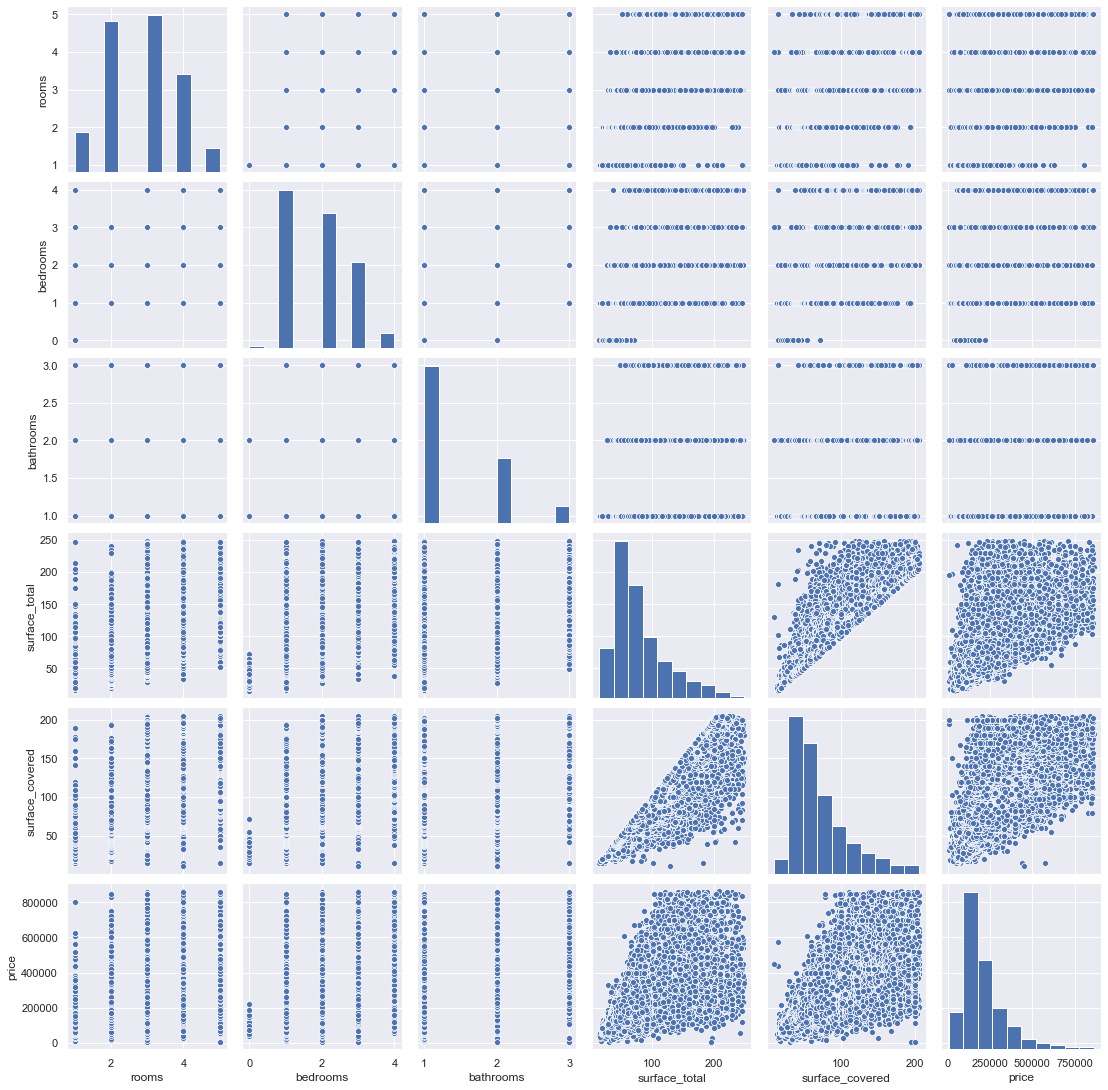

In [29]:
sns.pairplot(df1)

In [19]:
dumm= pd.get_dummies(df1.property_type)
dumm= pd.concat([df1, dumm], axis= 1)
dumm= dumm.drop('property_type', axis=1)
dumm

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Casa,Departamento,PH
0,NaN,NaN,2.0,140.0,140.0,153000.0,0,1,0
1,2.0,1.0,2.0,70.0,58.0,159000.0,0,0,1
2,2.0,1.0,1.0,45.0,45.0,125000.0,0,0,1
3,2.0,1.0,1.0,85.0,50.0,295000.0,0,0,1
5,2.0,1.0,1.0,56.0,56.0,150000.0,0,0,1
...,...,...,...,...,...,...,...,...,...
146553,4.0,3.0,2.0,106.0,100.0,620000.0,0,1,0
146554,4.0,3.0,3.0,175.0,111.0,570000.0,0,0,1
146555,3.0,2.0,2.0,144.0,134.0,480000.0,0,0,1
146556,4.0,2.0,2.0,NaN,143.0,530000.0,0,0,1


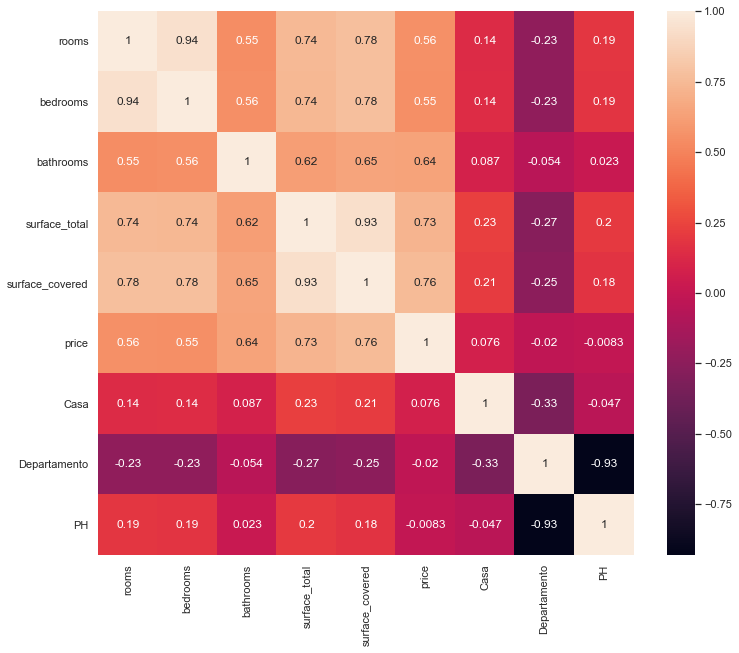

In [20]:
corr= dumm.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler
scl= StandardScaler()

In [22]:
price = dumm[["price","Departamento","Casa","PH"]]
price

,price,Departamento,Casa,PH
0,153000.0,1,0,0
1,159000.0,0,0,1
2,125000.0,0,0,1
3,295000.0,0,0,1
5,150000.0,0,0,1
...,...,...,...,...
146553,620000.0,1,0,0
146554,570000.0,0,0,1
146555,480000.0,0,0,1
146556,530000.0,0,0,1


In [23]:
escala= dumm.drop(['price', 'Departamento', 'Casa', 'PH'], axis=1)
escala

,rooms,bedrooms,bathrooms,surface_total,surface_covered
0,NaN,NaN,2.0,140.0,140.0
1,2.0,1.0,2.0,70.0,58.0
2,2.0,1.0,1.0,45.0,45.0
3,2.0,1.0,1.0,85.0,50.0
5,2.0,1.0,1.0,56.0,56.0
...,...,...,...,...,...
146553,4.0,3.0,2.0,106.0,100.0
146554,4.0,3.0,3.0,175.0,111.0
146555,3.0,2.0,2.0,144.0,134.0
146556,4.0,2.0,2.0,NaN,143.0


In [24]:
escalar= scl.fit_transform(escala.values)

In [25]:
df_escalar= pd.DataFrame(escalar, index=escala.index, columns= escala.columns)
df_escalar

,rooms,bedrooms,bathrooms,surface_total,surface_covered
0,NaN,NaN,0.934024,1.362307,1.764481
1,-0.805446,-1.003968,0.934024,-0.245915,-0.372169
2,-0.805446,-1.003968,-0.669990,-0.820280,-0.710906
3,-0.805446,-1.003968,-0.669990,0.098704,-0.580622
5,-0.805446,-1.003968,-0.669990,-0.567559,-0.424282
...,...,...,...,...,...
146553,1.157135,1.267269,0.934024,0.581171,0.722213
146554,1.157135,1.267269,2.538038,2.166417,1.008837
146555,0.175844,0.131651,0.934024,1.454205,1.608141
146556,1.157135,0.131651,0.934024,NaN,1.842651


In [26]:
df_scl= pd.concat([df_escalar, price], axis='columns')
df_scl

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Departamento,Casa,PH
0,NaN,NaN,0.934024,1.362307,1.764481,153000.0,1,0,0
1,-0.805446,-1.003968,0.934024,-0.245915,-0.372169,159000.0,0,0,1
2,-0.805446,-1.003968,-0.669990,-0.820280,-0.710906,125000.0,0,0,1
3,-0.805446,-1.003968,-0.669990,0.098704,-0.580622,295000.0,0,0,1
5,-0.805446,-1.003968,-0.669990,-0.567559,-0.424282,150000.0,0,0,1
...,...,...,...,...,...,...,...,...,...
146553,1.157135,1.267269,0.934024,0.581171,0.722213,620000.0,1,0,0
146554,1.157135,1.267269,2.538038,2.166417,1.008837,570000.0,0,0,1
146555,0.175844,0.131651,0.934024,1.454205,1.608141,480000.0,0,0,1
146556,1.157135,0.131651,0.934024,NaN,1.842651,530000.0,0,0,1


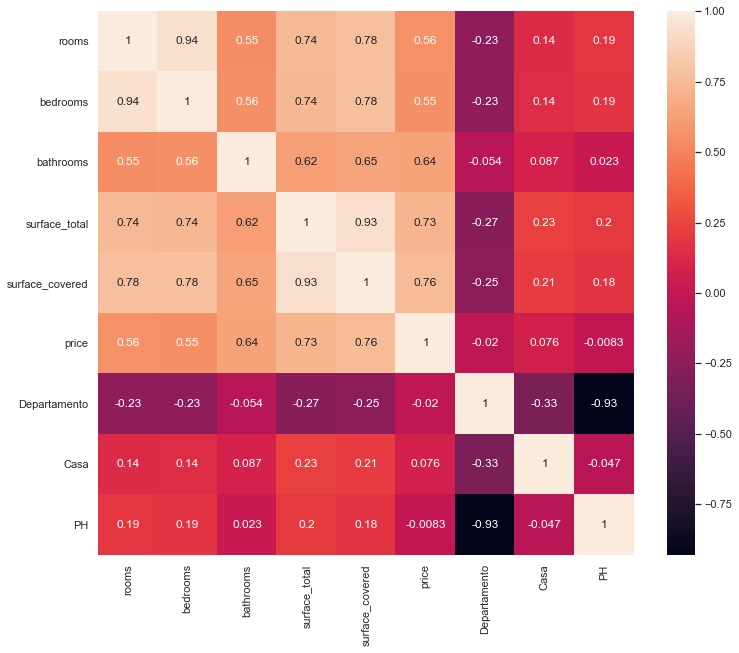

In [27]:
er= df_scl.corr()
plt.figure(figsize=(12,10))
sns.heatmap(er, annot=True)
plt.show()

In [28]:
df_pro= df_scl.dropna()
print('Datos originales: ', df.shape)
print('Datos con 3 sigmas: ', df_pro.shape)
print('Cantidad de datos descartados: ', 80276 - 72653)

Datos originales:  (80276, 7)
Datos con 3 sigmas:  (72653, 9)
Cantidad de datos descartados:  7623


In [71]:
df_pro.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Departamento,Casa,PH
1,-0.805446,-1.003968,0.934024,-0.245915,-0.372169,159000.0,0,0,1
2,-0.805446,-1.003968,-0.669990,-0.820280,-0.710906,125000.0,0,0,1
3,-0.805446,-1.003968,-0.669990,0.098704,-0.580622,295000.0,0,0,1
5,-0.805446,-1.003968,-0.669990,-0.567559,-0.424282,150000.0,0,0,1
6,-0.805446,-1.003968,-0.669990,-0.245915,-0.059488,159500.0,0,0,1


Machine Learning, comparación con modelos de proyecto I

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [28]:
x = df_pro[['rooms', 'bedrooms', 'bathrooms', 'surface_covered']]
Y= df_pro.price
Y.shape, x.shape

((72653,), (72653, 4))

In [29]:
from sklearn.decomposition import PCA
pca= PCA(n_components= 2)

x = pca.fit_transform(x)

In [30]:
x_train, x_test, Y_train, Y_test= train_test_split(x, Y, test_size= 0.25, random_state= 42)

In [31]:
knn= KNeighborsRegressor(n_neighbors= 6)
x = pd.DataFrame(pca.fit_transform(x))
knn.fit(x_train, Y_train)

KNeighborsRegressor(n_neighbors=6)

In [32]:
print('PORCENTAJE DE ACIERTO DEL MODELO KNN: ')
print(knn.score(x_train, Y_train))

PORCENTAJE DE ACIERTO DEL MODELO KNN: 
0.6724033528741944


In [33]:
pred_test= knn.predict(x_test)
pred_train= knn.predict(x_train)

In [34]:
print('ERROR DE KNN: ', np.sqrt(mean_squared_error(Y_train, pred_train)))

ERROR DE KNN:  71098.83581908315


In [35]:
tree= DecisionTreeRegressor(max_depth=7, random_state=42)
tree.fit(x_train, Y_train)

DecisionTreeRegressor(max_depth=7, random_state=42)

In [36]:
print('PORCENTAJE DE ACIERTO DEL MODELO TREE: ')
tree.score(x_train, Y_train)

PORCENTAJE DE ACIERTO DEL MODELO TREE: 


0.6508693327419686

In [37]:
trainpred= tree.predict(x_train)
print('ERROR DE TREE: ', np.sqrt(mean_squared_error(Y_train, trainpred)))

ERROR DE TREE:  73398.42903726008


In [38]:
lin = LinearRegression()
lin.fit(x_train, Y_train)

LinearRegression()

In [39]:
print('PORCENTAJE DE ACIERTO DEL MODELO BENCHMARK: ')
lin.score(x_train, Y_train)

PORCENTAJE DE ACIERTO DEL MODELO BENCHMARK: 


0.5327321670737464

In [40]:
train = lin.predict(x_train)
print('ERROR DEL MODELO: ', np.sqrt(mean_squared_error(Y_train, train)))

ERROR DEL MODELO:  84913.29778454287


## PARTE B - Modelos Avanzados


##### 1- Elige dos de los modelos avanzados vistos. Compara con el desempeño obtenido en el proyecto 01 (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.
##### 2- Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.
##### 3- Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.


In [30]:
df_pro.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Departamento,Casa,PH
1,-0.805446,-1.003968,0.934024,-0.245915,-0.372169,159000.0,0,0,1
2,-0.805446,-1.003968,-0.669990,-0.820280,-0.710906,125000.0,0,0,1
3,-0.805446,-1.003968,-0.669990,0.098704,-0.580622,295000.0,0,0,1
5,-0.805446,-1.003968,-0.669990,-0.567559,-0.424282,150000.0,0,0,1
6,-0.805446,-1.003968,-0.669990,-0.245915,-0.059488,159500.0,0,0,1


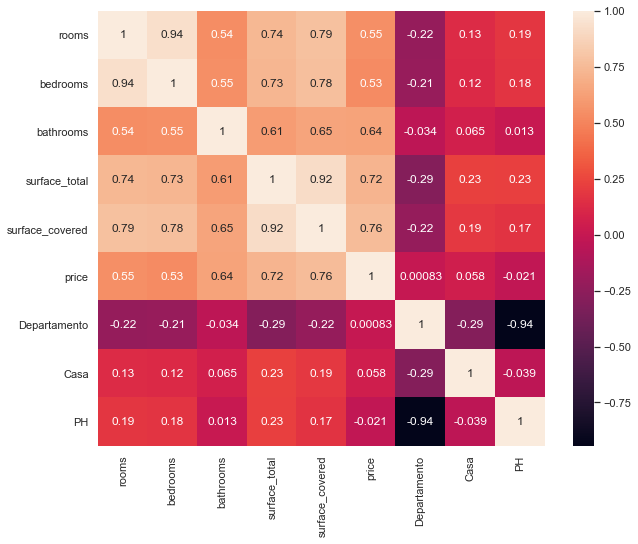

In [31]:
A = df_pro.corr()
plt.figure(figsize=(10,8))
sns.heatmap(A, annot=True)
plt.show()

In [32]:
X1= df_pro.drop(['price', 'PH', 'Casa', 'bedrooms', 'surface_total'], axis=1)
y= df_pro.price

In [33]:
from sklearn.decomposition import PCA
pca1= PCA()

X = pca1.fit_transform(X1)

In [34]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state= 42)

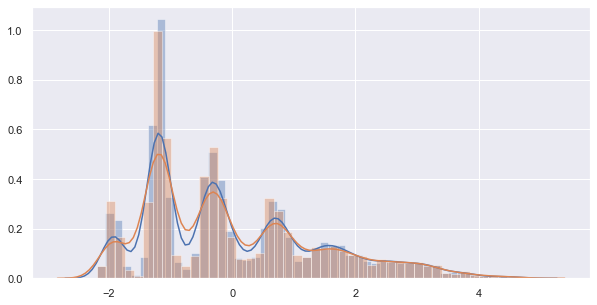

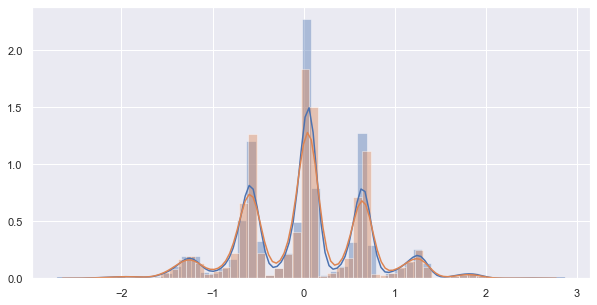

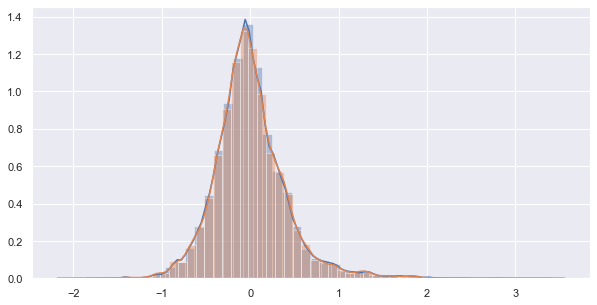

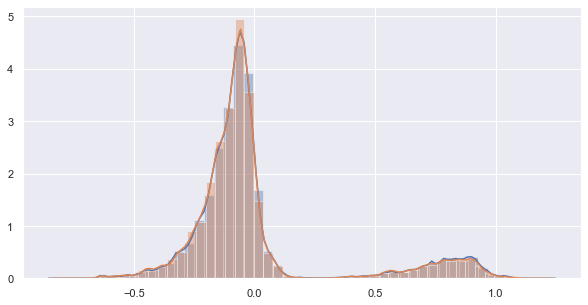

In [35]:
for i in range(X_train.shape[1]):
    plt.figure(figsize=(10,5))
    sns.distplot(X_train[:,i])
    sns.distplot(X_test[:,i])
    plt.show()

In [36]:
print('Proporcion de etiquetas positiva en los datos de Train: ', y_train.sum()/y_train.size)
print('Proporcion de etiquetas positiva en los datos de Test: ', y_test.sum()/y_test.size)

Proporcion de etiquetas positiva en los datos de Train:  204121.14388225146
Proporcion de etiquetas positiva en los datos de Test:  202951.9577185642


In [37]:
linea = LinearRegression()
linea.fit(X_train, y_train)

LinearRegression()

In [38]:
test_pred= linea.predict(X_test)
train_pred= linea.predict(X_train)
print('Acierto en test: ', linea.score(X_test, y_test))
print('Acierto en train: ', linea.score(X_train, y_train))

print('Error en test: ', np.sqrt(mean_squared_error(y_test, test_pred)))
print('Error en train: ', np.sqrt(mean_squared_error(y_train, train_pred)))

Acierto en test:  0.6364685315089729
Acierto en train:  0.646349019407268
Error en test:  74963.56241792512
Error en train:  73872.05810417903


In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.model_selection import cross_val_score

In [40]:
Arbol = RandomForestRegressor()
Knn = KNeighborsRegressor()
xgb= xgb.XGBRegressor()

In [41]:
Knn.fit(X_test, y_test)

KNeighborsRegressor()

In [42]:
Arbol.fit(X_test, y_test)

RandomForestRegressor()

In [43]:
xgb.fit(X_test, y_test)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [318]:
knn_param = {'n_neighbors':[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29],
              'weights': ['uniform', 'distance'], 
              'leaf_size':[1,3,5,7,10, 11, 13, 15],
              'algorithm':['auto', 'kd_tree']}

In [319]:
model = GridSearchCV(Knn, param_grid=knn_param, cv=4, n_jobs=-2)

model.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=KNeighborsRegressor(), n_jobs=-2,
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'leaf_size': [1, 3, 5, 7, 10, 11, 13, 15],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29],
                         'weights': ['uniform', 'distance']})

In [320]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)

Mejores parametros: {'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 29, 'weights': 'distance'}
Mejor Score: 0.7098841307327632



In [321]:
train_pred_knn= model.predict(X_train)
test_pred_knn= model.predict(X_test)
print('Error en train: ', np.sqrt(mean_squared_error(y_train, train_pred_knn)))
print('Error en test: ', np.sqrt(mean_squared_error(y_test, test_pred_knn)))

Error en train:  61733.134475931685
Error en test:  66624.35490095479


In [322]:
arbol_param = {'n_estimators':[100, 200, 300],
              'max_depth': [None, 5, 10, 15, 20], 
              'max_features': ['auto', 'log2']}

In [323]:
model1 = GridSearchCV(Arbol, param_grid=arbol_param, cv=4, n_jobs=-2)

model1.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=-2,
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [100, 200, 300]})

In [324]:
print("Mejores parametros: "+str(model1.best_params_))
print("Mejor Score: "+str(model1.best_score_)+'\n')


scores1 = pd.DataFrame(model1.cv_results_)

Mejores parametros: {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 300}
Mejor Score: 0.7184836125249706



In [325]:
train_pred_arb= model1.predict(X_train)
test_pred_arb= model1.predict(X_test)
print(np.sqrt(mean_squared_error(y_train, train_pred_arb)))
print(np.sqrt(mean_squared_error(y_test, test_pred_arb)))

63259.12257720032
66427.82247197168


In [330]:
xgb_param={'n_estimators':[100, 200, 300, 400],
           'max_depth': [4,6,8,10],
           'eta': [0.1,0.3, 0.5],
           'max_levels': [4,5,6,7,8],
           'subsample': [0.5,0.75,1.0]}

In [332]:
model2= GridSearchCV(xgb, param_grid= xgb_param, cv=4, n_jobs=-2)

model2.fit(X_train, y_train)

[13:39:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { max_levels } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
      

In [333]:
print("Mejores parametros: "+str(model2.best_params_))
print("Mejor Score: "+str(model2.best_score_)+'\n')

scores2 = pd.DataFrame(model2.cv_results_)

Mejores parametros: {'eta': 0.1, 'max_depth': 6, 'max_levels': 4, 'n_estimators': 100, 'subsample': 1.0}
Mejor Score: 0.7184111956182764



In [334]:
train_pred_xgb= model2.predict(X_train)
test_pred_xgb= model2.predict(X_test)
print(np.sqrt(mean_squared_error(y_train, train_pred_xgb)))
print(np.sqrt(mean_squared_error(y_test, test_pred_xgb)))

62245.939638855656
66027.4808197002


In [362]:
Poly= PolynomialFeatures(degree=3, include_bias=False)

In [363]:
X_testp= Poly.fit_transform(X_test)
X_trainp = Poly.fit_transform(X_train)

In [364]:
reg_p= LinearRegression()

In [365]:
reg_p.fit(X_trainp, y_train)

LinearRegression()

In [366]:
reg_p.score(X_trainp, y_train)

0.6817605045925538

In [367]:
trainp= reg_p.predict(X_trainp)
testp= reg_p.predict(X_testp)
print('Error en train: ', np.sqrt(mean_squared_error(y_train, trainp)))
print('Error en test: ', np.sqrt(mean_squared_error(y_test, testp)))

Error en train:  70076.08069824424
Error en test:  71460.54317500348


In [368]:
print(f'Pendientes:  {reg_p.coef_}')
print(f'Ordenada: {reg_p.intercept_}')

Pendientes:  [-3.37009073e+14  7.15544616e+14 -8.35780992e+14 -3.73810726e+15
 -1.60828664e+15 -3.91020946e+15  5.09819125e+14 -3.25461519e+15
 -2.85671756e+15  1.32852066e+15 -2.06721711e+15 -2.89216666e+14
 -3.60176138e+14  1.74256791e+15  2.92805445e+14  1.17138900e+15
 -2.24125827e+14  5.14031577e+14  1.77730672e+15 -9.66544511e+14
 -5.07748298e+14  2.14748830e+14  1.33051466e+15  4.23141291e+15
  8.26184943e+14 -5.64259865e+14  2.05443503e+14  7.18249456e+13
 -5.68601248e+14 -1.55986944e+14  3.72294729e+13  7.11435881e+14
  3.02480020e+15  3.43786436e+15]
Ordenada: 2028051051118921.8


In [369]:
reg_lasso = Lasso(alpha= 0.5)
reg_ridge= Ridge(alpha= 0.05)

In [370]:
reg_lasso.fit(X_trainp, y_train)

C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33199575996357.125, tolerance: 84080322468.43983
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.5)

In [371]:
reg_lasso.score(X_trainp, y_train)

0.6817605966951112

In [372]:
reg_ridge.fit(X_trainp, y_train)

Ridge(alpha=0.05)

In [373]:
reg_ridge.score(X_trainp, y_train)

0.6817606098196249

In [374]:
predlas= reg_lasso.predict(X_trainp)
predrig= reg_ridge.predict(X_trainp)
predlast=reg_lasso.predict(X_testp)
predrigt=reg_ridge.predict(X_testp)
print('Error en train de Lasso: ', np.sqrt(mean_squared_error(y_train, predlas)))
print('Error de train en Ridge: ', np.sqrt(mean_squared_error(y_train, predrig)))
print('Error de test en Lasso: ', np.sqrt(mean_squared_error(y_test, predlast)))
print('Error de test en Ridge: ', np.sqrt(mean_squared_error(y_test, predrigt)))

Error en train de Lasso:  70076.070557789
Error de train en Ridge:  70076.06911278512
Error de test en Lasso:  71460.5709370604
Error de test en Ridge:  71460.49420971116


In [375]:
print(f'Pendientes: {reg_ridge.coef_}')
print(f'Ordenada: {reg_ridge.intercept_}')

Pendientes: [ 67694.20340744  16924.9062394  115943.37743607 -51893.3770185
  -1062.14971054  16285.69311322   4952.55634489 -22150.10383792
   5324.05288869  33189.87631839 -21190.93169699  -2007.04115063
 -60292.12627158  -8487.3772324    -487.30457871  -4106.53593994
  -2797.72685826   2551.3185124     425.84143563   1592.91393369
  10984.65245853  -3621.481659    -1574.96237255  -7165.65042958
   2110.92257665   4455.74365027   5393.95470199  -4975.71497777
 -11657.96508674  -6083.47719269  -8769.60857167  -2240.18389358
 -38406.94542579  -7595.45652953]
Ordenada: 211049.735611416


In [348]:
print(f'Pendientes: {reg_lasso.coef_}')
print(f'Ordenada: {reg_lasso.intercept_}')

Pendientes: [ 66737.47665504  17946.23150381 111985.87490976 -65256.90172157
  -3039.88779791  11317.3370002    5022.78704448 -26469.64148718
   2771.05684489  34806.23212517 -31675.05562279  -3794.54058142
 -68870.04745369    132.69925283   -129.88571316  -2689.2717229
  -3011.17676587   3315.71394981   2516.57523245    315.49675757
  10558.40783869  -3131.36831367   1823.53881477     -0.
   3229.42470293   3701.02914581   3804.11443545  -5233.9939833
 -13624.08320211     -0.          -8362.34117543   3177.37897877
 -18651.03969723   2049.41498952]
Ordenada: 212282.11766474368


In [377]:
df_pc= pd.DataFrame(data= pca1.components_, index = ['PC1', 'PC2', 'PC3', 'PC4'], columns=X1.columns)
df_pc

,rooms,bathrooms,surface_covered,Departamento
PC1,0.613769,0.562616,0.552105,-0.043944
PC2,-0.560182,0.798842,-0.181521,0.122870
PC3,-0.556196,-0.185832,0.795568,-0.152264
PC4,-0.011343,0.103834,-0.171179,-0.979688


<Figure size 1080x720 with 0 Axes>

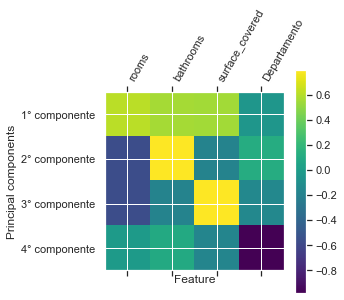

In [380]:
plt.figure(figsize=(15,10))
plt.matshow(pca1.components_, cmap='viridis')
plt.yticks([0, 1, 2, 3], ["1° componente", "2° componente", "3° componente", "4° componente"])
plt.colorbar()
plt.xticks(range(len(X1.columns)),
 df_pc.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")
plt.show()

In [381]:
pd.DataFrame(df_pc.mean())

,0
rooms,-0.128488
bathrooms,0.319865
surface_covered,0.248743
Departamento,-0.263257


[0.73877134 0.16593379 0.05953425 0.03576062]


Text(0, 0.5, 'varianza explicada')

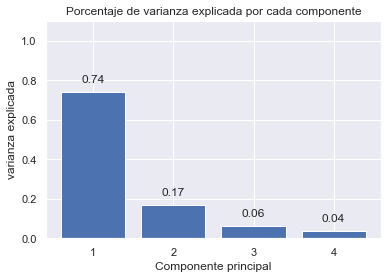

In [382]:
print(pca1.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(x = np.arange(pca1.n_components_) + 1, height = pca1.explained_variance_ratio_)

for x, y in zip(np.arange(len(X1.columns)) + 1, pca1.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(label, (x,y),textcoords="offset points",xytext=(0,10),ha="center")

ax.set_xticks(np.arange(pca1.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title("Porcentaje de varianza explicada por cada componente")
ax.set_xlabel("Componente principal")
ax.set_ylabel("varianza explicada")

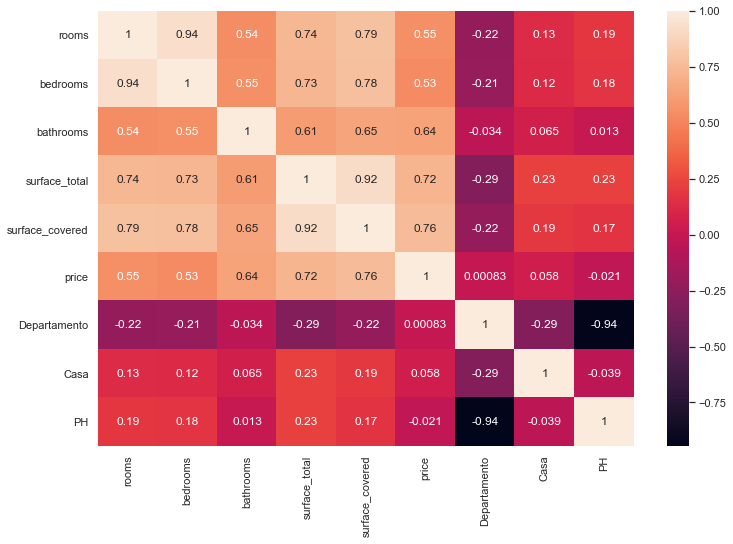

In [383]:
t = df_pro.corr()
plt.figure(figsize=(12,8))
sns.heatmap(t, annot=True)
plt.show()

In [131]:
X_new1= df_pro[['bathrooms', 'surface_covered', 'rooms', 'Departamento']]
y_new= df_pro.price
X_new1.shape

(72653, 4)

In [132]:
Pca= PCA()
X_new= Pca.fit_transform(X_new1)

In [133]:
X_newtrain, X_newtest, y_newtrain, y_newtest= train_test_split(X_new, y_new, test_size=0.25, random_state=42)

In [134]:
bench= LinearRegression()
bench.fit(X_newtrain, y_newtrain)
benchtr= bench.predict(X_newtrain)
benchts= bench.predict(X_newtest)
print('SCORE: ', bench.score(X_newtrain, y_newtrain))
print('ERROR DEL MODELO TRAIN: ', np.sqrt(mean_squared_error(y_newtrain, benchtr)))
print('ERROR DEL MODELO TEST: ', np.sqrt(mean_squared_error(y_newtest, benchts)))

SCORE:  0.646349019407268
ERROR DEL MODELO TRAIN:  73872.05810417903
ERROR DEL MODELO TEST:  74963.56241792512


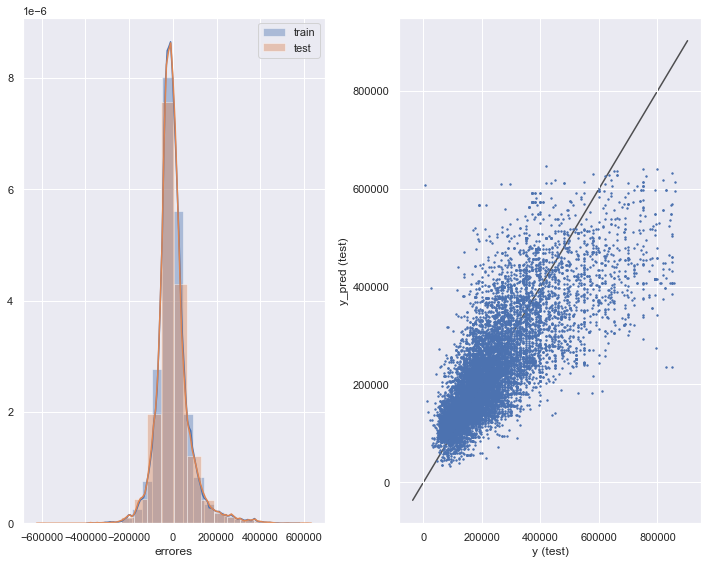

In [135]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.distplot(y_newtrain - benchtr, bins = 20, label = 'train')
sns.distplot(y_newtest - benchts, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_newtest,benchts, s =2)
    
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]), 
    np.max([ax.get_xlim(), ax.get_ylim()]), 
    ]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

In [136]:
Knn1 = KNeighborsRegressor(n_neighbors= 10, leaf_size=10, weights= 'distance', algorithm='auto') 

In [137]:
Knn1.fit(X_newtrain, y_newtrain)

KNeighborsRegressor(leaf_size=10, n_neighbors=10, weights='distance')

In [138]:
Knn1.score(X_newtrain, y_newtrain)

0.739962588625102

In [139]:
ktr= Knn1.predict(X_newtrain)
kts= Knn1.predict(X_newtest)
print('ERROR DEL MODELO TRAIN: ', np.sqrt(mean_squared_error(y_train, ktr)))
print('ERROR DEL MODELO TEST: ', np.sqrt(mean_squared_error(y_test, kts)))

ERROR DEL MODELO TRAIN:  63344.758175765644
ERROR DEL MODELO TEST:  67928.34964508691


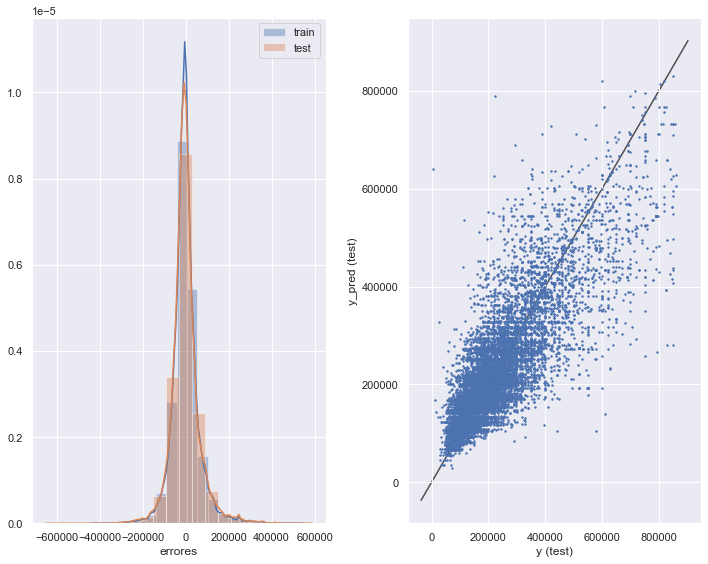

In [140]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.distplot(y_newtrain - ktr, bins = 20, label = 'train')
sns.distplot(y_newtest - kts, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_newtest,kts, s =2)
    
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]), 
    np.max([ax.get_xlim(), ax.get_ylim()]), 
    ]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

In [141]:
Arbol1=RandomForestRegressor(max_depth=10, n_estimators=300, max_features='log2') 

In [142]:
Arbol1.fit(X_newtrain, y_newtrain)

RandomForestRegressor(max_depth=10, max_features='log2', n_estimators=300)

In [143]:
Arbol1.score(X_newtrain, y_newtrain)

0.7405706989406291

In [144]:
arbtr= Arbol1.predict(X_newtrain)
arbts= Arbol1.predict(X_newtest)
print('ERROR DEL MODELO TRAIN: ', np.sqrt(mean_squared_error(y_train, arbtr)))
print('ERROR DEL MODELO TEST: ', np.sqrt(mean_squared_error(y_test, arbts)))

ERROR DEL MODELO TRAIN:  63270.6474014156
ERROR DEL MODELO TEST:  66454.71698477767


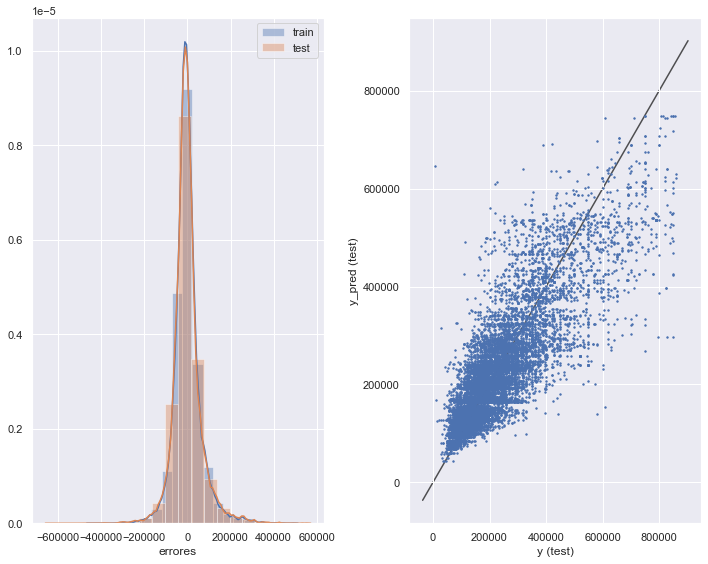

In [145]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.distplot(y_newtrain - arbtr, bins = 20, label = 'train')
sns.distplot(y_newtest - arbts, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_newtest,arbts, s =2)
    
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]), 
    np.max([ax.get_xlim(), ax.get_ylim()]), 
    ]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

In [146]:
import xgboost as xgb

In [147]:
xgb1 = xgb.XGBRegressor(eta= 0.1, max_depth= 6, max_levels= 4, n_estimators= 100, subsample= 1.0)

In [148]:
xgb1.fit(X_newtrain, y_newtrain)

[11:00:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { max_levels } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=6,
             max_levels=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1.0, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [149]:
xgb1.score(X_newtrain, y_newtrain)

0.735278394825728

In [150]:
xgbtr= xgb1.predict(X_newtrain)
xgbts= xgb1.predict(X_newtest)
print('ERROR DEL MODELO TRAIN: ', np.sqrt(mean_squared_error(y_train, xgbtr)))
print('ERROR DEL MODELO TEST: ', np.sqrt(mean_squared_error(y_test, xgbts)))

ERROR DEL MODELO TRAIN:  63912.74334182262
ERROR DEL MODELO TEST:  66535.2091579525


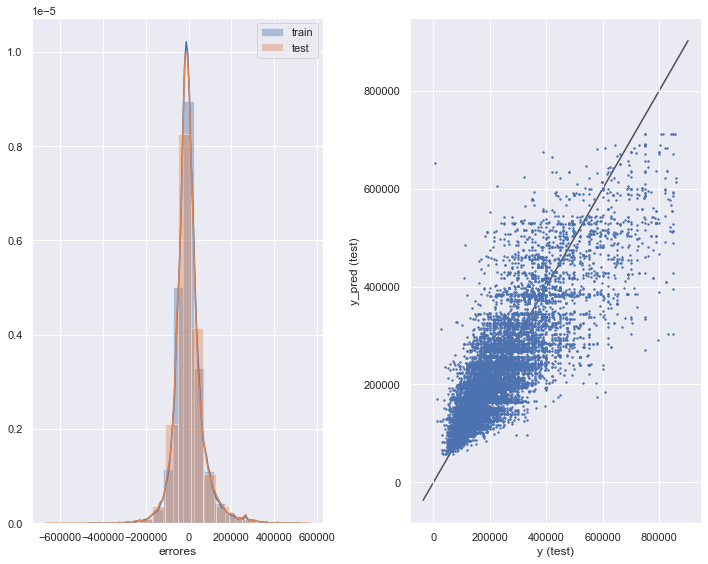

In [151]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.distplot(y_newtrain - xgbtr, bins = 20, label = 'train')
sns.distplot(y_newtest - xgbts, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_newtest,xgbts, s =2)
    
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]), 
    np.max([ax.get_xlim(), ax.get_ylim()]), 
    ]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

## PARTE C - Interpretación de modelos

* De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:


##### 1- ¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

##### 2- ¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

In [153]:
importancia_predictores = pd.DataFrame({"Predictor": X_new1.columns,"Importancia": Arbol1.feature_importances_})
print("Importancia de los predictores en el modelo")
importancia_predictores.sort_values("Importancia", ascending=False)

Importancia de los predictores en el modelo


,Predictor,Importancia
0,bathrooms,0.575430
3,Departamento,0.200791
1,surface_covered,0.119302
2,rooms,0.104477


# Desafío

In [87]:
barrios= df_filter.copy()
barrios=barrios.dropna()

In [88]:
latlon= barrios[['lat', 'lon','l3']]

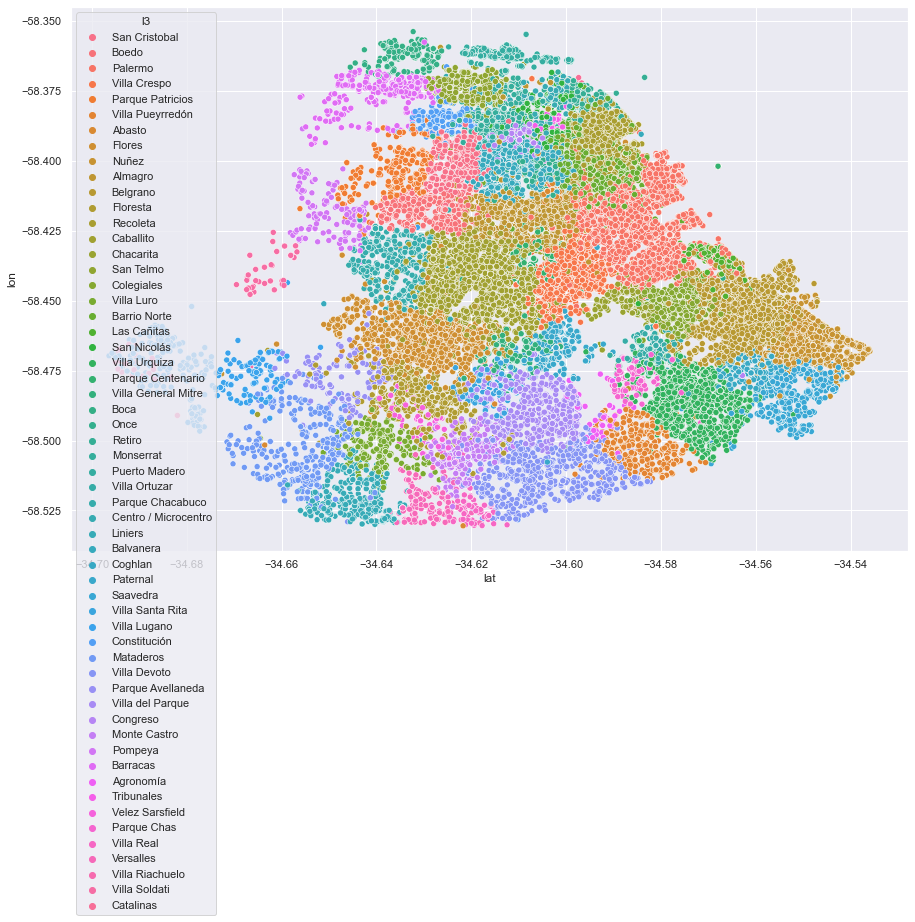

In [134]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=barrios, x='lat', y='lon', hue='l3')
plt.show()

In [137]:
conteo_puntos = barrios.groupby(['lat', 'lon']).size()
conteo_puntos[conteo_puntos > 1].sort_values(ascending=False).head(10)

lat         lon       
-34.597256  -58.445498    254
-34.578066  -58.426532    236
-34.579326  -58.455819    217
-34.596762  -58.421589    205
-34.587383  -58.397276    190
-34.542750  -58.460145    168
-34.589767  -58.420728    168
-34.601364  -58.430143    153
-34.605265  -58.424579    151
-34.588007  -58.420122    139
dtype: int64

In [138]:
conteo_puntos[conteo_puntos > 1].sort_values(ascending=False).tail(10)

lat         lon       
-34.605108  -58.404584    2
-34.605106  -58.420175    2
-34.605100  -58.364341    2
-34.579729  -58.466004    2
-34.579741  -58.490327    2
-34.605086  -58.384630    2
-34.605077  -58.420229    2
-34.605068  -58.453051    2
-34.605066  -58.455405    2
-34.695790  -58.468809    2
dtype: int64

In [154]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [181]:
data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
df_cluster= pd.DataFrame(data)
clus = df_cluster[['lat', 'lon','l2', 'l3']]
clus

,lat,lon,l2,l3
0,-34.605880,-58.384949,Capital Federal,San Cristobal
1,-34.624056,-58.412110,Capital Federal,Boedo
2,-34.593569,-58.427474,Capital Federal,Palermo
3,-34.581294,-58.436754,Capital Federal,Palermo
4,-34.914194,-57.938219,Bs.As. G.B.A. Zona Sur,La Plata
...,...,...,...,...
146655,-34.816348,-58.181963,Bs.As. G.B.A. Zona Sur,Berazategui
146656,-34.446459,-58.937810,Bs.As. G.B.A. Zona Norte,Pilar
146657,-34.444633,-58.981606,Bs.As. G.B.A. Zona Norte,Pilar
146658,-34.444830,-58.981796,Bs.As. G.B.A. Zona Norte,Pilar


In [182]:
clus.isnull().sum()

lat    9925
lon    9959
l2        0
l3        0
dtype: int64

In [183]:
clus = clus.dropna()
clus

,lat,lon,l2,l3
0,-34.605880,-58.384949,Capital Federal,San Cristobal
1,-34.624056,-58.412110,Capital Federal,Boedo
2,-34.593569,-58.427474,Capital Federal,Palermo
3,-34.581294,-58.436754,Capital Federal,Palermo
4,-34.914194,-57.938219,Bs.As. G.B.A. Zona Sur,La Plata
...,...,...,...,...
146655,-34.816348,-58.181963,Bs.As. G.B.A. Zona Sur,Berazategui
146656,-34.446459,-58.937810,Bs.As. G.B.A. Zona Norte,Pilar
146657,-34.444633,-58.981606,Bs.As. G.B.A. Zona Norte,Pilar
146658,-34.444830,-58.981796,Bs.As. G.B.A. Zona Norte,Pilar


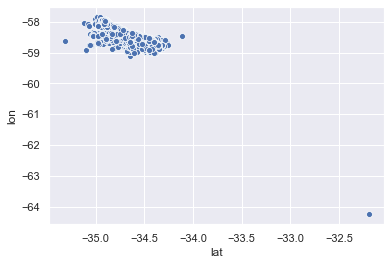

In [184]:
muestra= clus.sample(n=20000, random_state=10)
sns.scatterplot(data= muestra, x='lat', y='lon')
plt.show()

In [189]:
clus_out = clus[clus.lon < -60]
clus_out = clus[clus.lat < -34]
clus_out

,lat,lon,l2,l3
0,-34.605880,-58.384949,Capital Federal,San Cristobal
1,-34.624056,-58.412110,Capital Federal,Boedo
2,-34.593569,-58.427474,Capital Federal,Palermo
3,-34.581294,-58.436754,Capital Federal,Palermo
4,-34.914194,-57.938219,Bs.As. G.B.A. Zona Sur,La Plata
...,...,...,...,...
146655,-34.816348,-58.181963,Bs.As. G.B.A. Zona Sur,Berazategui
146656,-34.446459,-58.937810,Bs.As. G.B.A. Zona Norte,Pilar
146657,-34.444633,-58.981606,Bs.As. G.B.A. Zona Norte,Pilar
146658,-34.444830,-58.981796,Bs.As. G.B.A. Zona Norte,Pilar


In [190]:
PCA11 = PCA(n_components=2)
X_clus= clus_out[['lat', 'lon']]
X_clusnew= PCA11.fit_transform(X_clus)
X_clusnew.shape

(136697, 2)

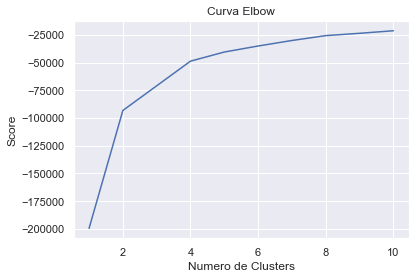

In [191]:
rango = [1,2,4,5,6,7,8,9,10]

kmeans = [KMeans(n_clusters=i) for i in rango]

score = [kmeans[i].fit(X_new).score(X_new) for i in range(len(kmeans))]

plt.plot(rango,score)
plt.xlabel("Numero de Clusters")
plt.ylabel("Score")
plt.title("Curva Elbow")
plt.show()

In [192]:
kmeans_l2 = KMeans(n_clusters=4, random_state=0)
train_kmeans = kmeans_l2.fit(X_clusnew)

In [193]:
etiquetas = kmeans_l2.labels_
print(etiquetas.shape)

centros = kmeans_l2.cluster_centers_
print(centros)

(136697,)
[[-0.27358173  0.0161036 ]
 [ 0.56299948  0.01847362]
 [ 0.00611978 -0.01436876]
 [ 0.15606144  0.09692407]]


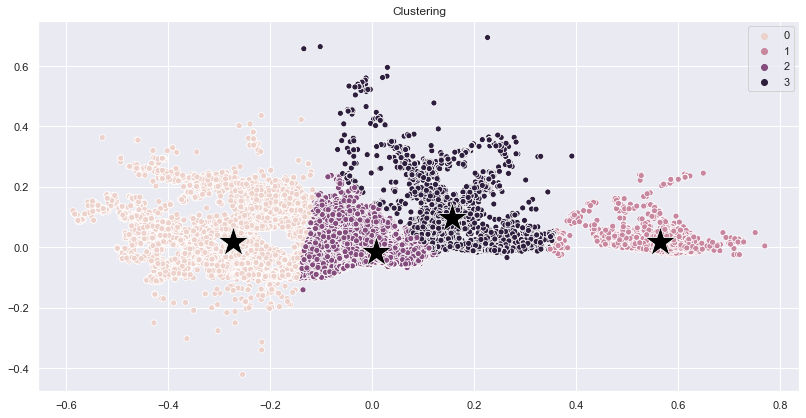

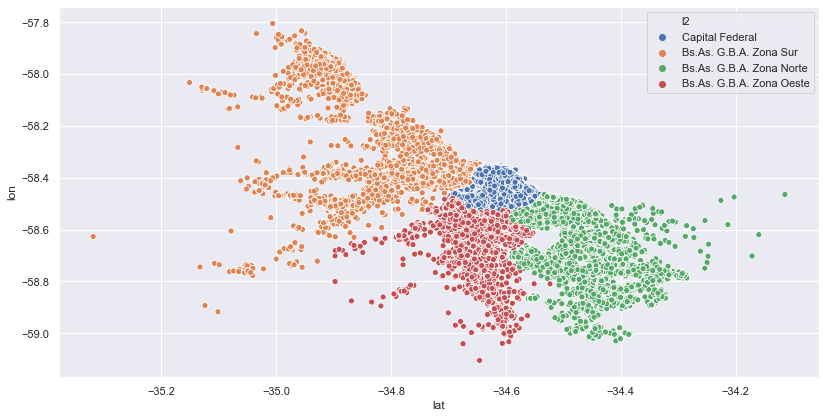

In [196]:
fig = plt.figure(figsize=(30,15))
plt.subplot(2,2,1)
sns.scatterplot(X_clusnew[:, 0], X_clusnew[:,-1], hue = etiquetas)
sns.scatterplot(centros[:, 0], centros[:, 1],color='black', marker="*", s=1000)
plt.title('Clustering')


fig = plt.figure(figsize=(30,15))
plt.subplot(2,2,2)
sns.scatterplot(data=clus_out, x = "lat", y = "lon",hue = "l2")
plt.show()

In [198]:
cluster_labels = kmeans_l2.predict(X_clusnew)
silhouette =  silhouette_score(X_clusnew, cluster_labels)

print("Para 4 Clusters el silhouette_score es :", silhouette)

Para 4 Clusters el silhouette_score es : 0.5838365757132575


# Conclusión.

Doy por concluído este proyecto, el cual me enfrento a cuestiones realmente desafiantes. Me enriquecí más allá de las clases y fue lo que más valoro de este proyecto.
Tuve bastantes problemas al no tener una "Guía" de mínimos entregables como en el primer proyecto, pero eso fue lo que me llevo a ir mas allá de lo visto y resolver las distintas dificultades que se me presentaron en este segundo proyecto.

                                                                                                            Nicolas Lorenzon